Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




In [2]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import os
from os.path import join
import cv2
import pandas as pd

In [3]:
data = "/flowers"

# List out the directories inside the main input folder

folders = os.listdir(data)

print(folders)

['rose', 'tulip', 'dandelion', 'sunflower', 'daisy']


In [4]:
image_names = []
labels = []
data_images = []


size = 128,128

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            data_images.append(im)
        else:
            continue

In [5]:
label_dummies = pd.get_dummies(labels)

labels =  label_dummies.values.argmax(1)

In [6]:
pd.unique(labels)

array([2, 4, 1, 3, 0])

In [7]:
labels=np.asarray(labels).astype("float32")
data = np.asarray(data_images).astype("float32")/255.0

In [8]:
print(f"Shape of images is :{data.shape}")
print(f"Shape of labels is :{labels.shape}")

Shape of images is :(4328, 128, 128, 3)
Shape of labels is :(4328,)


In [9]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=.40,random_state=1)

In [10]:
print(f"Shape of training data is:{X_train.shape}\nShape of testing data is :{X_test.shape}")

Shape of training data is:(2596, 128, 128, 3)
Shape of testing data is :(1732, 128, 128, 3)


In [11]:
print(f"Shape of training labels is:{y_train.shape}\nShape of testing labels is :{y_test.shape}")

Shape of training labels is:(2596,)
Shape of testing labels is :(1732,)


In [12]:
# Check first image of Training data
X_train[0]

array([[[0.02745098, 0.05098039, 0.05098039],
        [0.01568628, 0.07450981, 0.0627451 ],
        [0.04313726, 0.12156863, 0.07843138],
        ...,
        [0.01568628, 0.2509804 , 0.33333334],
        [0.01568628, 0.3019608 , 0.40392157],
        [0.        , 0.29803923, 0.38431373]],

       [[0.00392157, 0.02352941, 0.01960784],
        [0.05882353, 0.10196079, 0.10196079],
        [0.02352941, 0.05490196, 0.04705882],
        ...,
        [0.05098039, 0.28627452, 0.36862746],
        [0.        , 0.31764707, 0.4117647 ],
        [0.        , 0.31764707, 0.39607844]],

       [[0.00784314, 0.03921569, 0.02352941],
        [0.        , 0.02352941, 0.01960784],
        [0.15294118, 0.1764706 , 0.17254902],
        ...,
        [0.01176471, 0.3137255 , 0.39215687],
        [0.        , 0.32156864, 0.40392157],
        [0.01568628, 0.30588236, 0.39215687]],

       ...,

       [[0.5294118 , 0.7764706 , 0.85490197],
        [0.6431373 , 0.7647059 , 0.827451  ],
        [0.70980394, 0

In [13]:

from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

network =Sequential()
network.add(Conv2D(10, (2,2),input_shape=(128, 128, 3),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Conv2D(12, (2,2),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Flatten())
network.add(Dense(128,activation='relu'))
network.add(Dense(5,activation='softmax'))

In [14]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 10)      130       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 12)        492       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 11532)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1476224   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [15]:
network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
x_val = X_train[:700]
partial_x_train = X_train[700:]
y_val = y_train[:700]
partial_y_train = y_train[700:]

In [17]:
batch_size = 5
epochs = 10
history=network.fit(partial_x_train, partial_y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val, y_val))

Epoch 1/10
380/380 [==============================] - 5s 6ms/step - loss: 1.5615 - accuracy: 0.3582 - val_loss: 1.0694 - val_accuracy: 0.5614
Epoch 2/10
380/380 [==============================] - 2s 4ms/step - loss: 0.9963 - accuracy: 0.6304 - val_loss: 1.0615 - val_accuracy: 0.5714
Epoch 3/10
380/380 [==============================] - 2s 4ms/step - loss: 0.7331 - accuracy: 0.7406 - val_loss: 1.0280 - val_accuracy: 0.6129
Epoch 4/10
380/380 [==============================] - 2s 4ms/step - loss: 0.3623 - accuracy: 0.8898 - val_loss: 1.2773 - val_accuracy: 0.5814
Epoch 5/10
380/380 [==============================] - 2s 4ms/step - loss: 0.1552 - accuracy: 0.9604 - val_loss: 1.5095 - val_accuracy: 0.5786
Epoch 6/10
380/380 [==============================] - 2s 4ms/step - loss: 0.0937 - accuracy: 0.9764 - val_loss: 1.8714 - val_accuracy: 0.5486
Epoch 7/10
380/380 [==============================] - 2s 4ms/step - loss: 0.0882 - accuracy: 0.9783 - val_loss: 1.9044 - val_accuracy: 0.5829
Epoch 

In [18]:
history_dict = history.history
history_dict.keys()
[u'accuracy', u'loss', u'val_accuracy', u'val_loss']

['accuracy', 'loss', 'val_accuracy', 'val_loss']

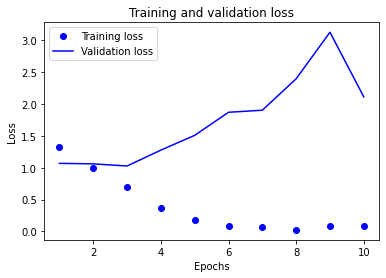

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
network.evaluate(X_test,y_test)

55/55 [==============================] - 0s 6ms/step - loss: 2.2580 - accuracy: 0.5520


[2.258028268814087, 0.5519630312919617]

In [21]:
pred = network.predict_classes(X_test[:10])
for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

2 ==> 1.0
1 ==> 1.0
2 ==> 4.0
4 ==> 0.0
1 ==> 1.0
4 ==> 4.0
1 ==> 1.0
1 ==> 1.0
4 ==> 4.0
1 ==> 1.0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


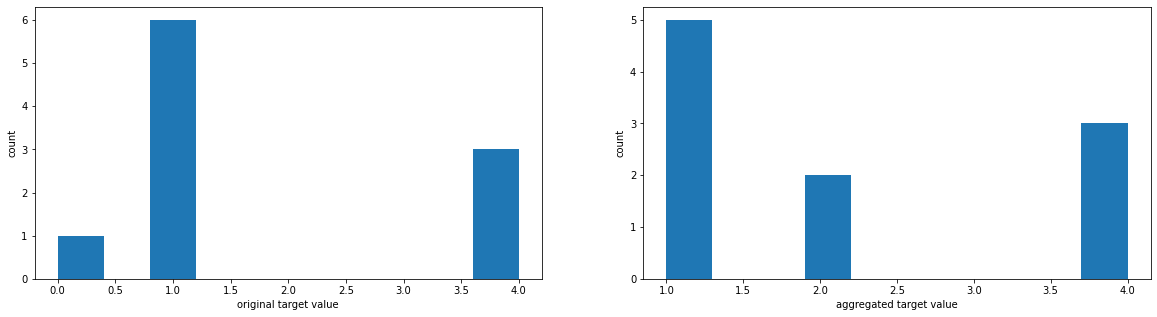

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y_test[:10])
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(pred)
plt.xlabel('aggregated target value')
plt.ylabel('count')
plt.show()